### DRUGS REVIEW SENTIMENT ANALYSIS

This notebook is to predict the sentiment of the drug users, according to reiews and various other features like the condition theu are suffering from,
the rating of the drugs used, data of the usage and others.

##### About the Dataset
The Drug Review Dataset is taken from the UCI Machine Learning Repository. This Dataset provides patient reviewd on specific drugs along with related conditions and a 10 star patient rating reflecting the overall patient satisfaction. The data was obtained by crawling pharmaceutical review sites. The Drug Review Data seti is of shape(161207,7).

The features are 'drugName' which is the name of the drug, 'condition' which is the condition the patient is suffering from, 'review' is the patients review, 'rating' is the 10-star patient rating for the drug, 'date' is the date of the entry and the 'usefulcount' is the number of users who found the review useful.

Here the sentiment of the review is the target variable that needs to be predicted. here we can notice that the sentiment of any review is not given, so we have to give the sentiment to the rating first and then use it as the target variable.

#### 1. Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load the dataset
test = pd.read_csv('drugsComTest_raw.csv')
df = pd.read_csv('drugsComTrain_raw.csv')

#### 2. Descriptive Statistics

In [3]:
# What are the columns on the data
df.columns

Index(['uniqueID', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount'],
      dtype='object')

In [4]:
#Statistical Information on the Data
print(df.describe())
print('*******************************************************************************')

#Information on the Dataset
print(df.info())
print('********************************************************************************')

#Checking the Data types of the Dataset
print(df.dtypes)
print('*********************************************************************************')

#Checking for null Values
print(df.isnull().any())

            uniqueID         rating    usefulCount
count  161297.000000  161297.000000  161297.000000
mean   115923.585305       6.994377      28.004755
std     67004.445170       3.272329      36.403742
min         2.000000       1.000000       0.000000
25%     58063.000000       5.000000       6.000000
50%    115744.000000       8.000000      16.000000
75%    173776.000000      10.000000      36.000000
max    232291.000000      10.000000    1291.000000
*******************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   uniqueID     161297 non-null  int64 
 1   drugName     161297 non-null  object
 2   condition    160398 non-null  object
 3   review       161297 non-null  object
 4   rating       161297 non-null  int64 
 5   date         161297 non-null  object
 6   usefulCoun

In [5]:
df.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


#### 3.Data Visualization

##### **3A. Visualizing Drugnames/Ratings/Conditions**

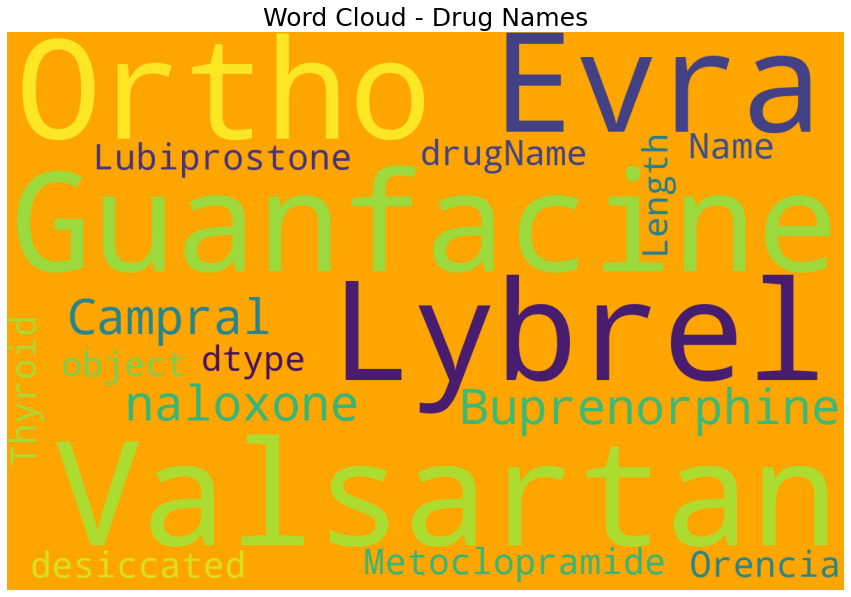

In [6]:
#most popular drugs
from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'orange', stopwords = stopwords, width = 1200, height = 800).generate(str(df['drugName']))

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Word Cloud - Drug Names', fontsize = 25)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

This is a word cloud for the drug names, The Following drugs seems to be popular: 
* Guanfacine
* Valsartan
* Evra
* Ortho
* Lybrel

##### 3.1 Which are the  top 20 drugs wiht the 10/10 rating??

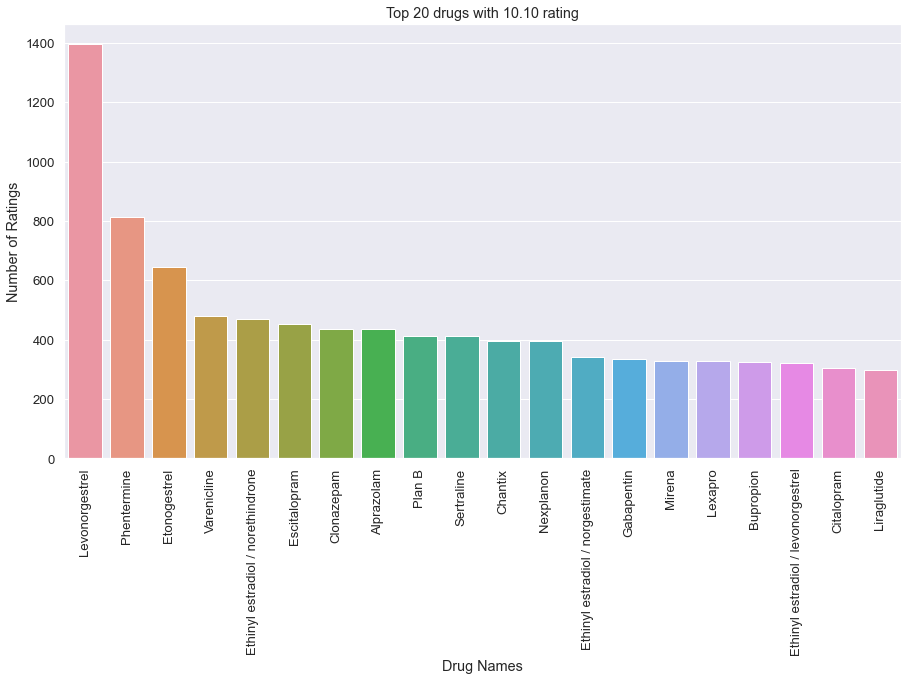

In [7]:
#Setting the parameter
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [15,8]

rating = dict(df.loc[df.rating ==10, "drugName"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20])

sns_rating.set_title('Top 20 drugs with 10.10 rating')
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90);

In the bar graph which shows the top 20 drugs given in the dataset with rating of 10/10. 'Levonorgstrel' is the 
drug with the highest number of 10/10 ratings, about 1883 Ratings in the dataset for Levonorgestre.

##### 3.2 Which top 20 drugs have a 1/10 ratings??

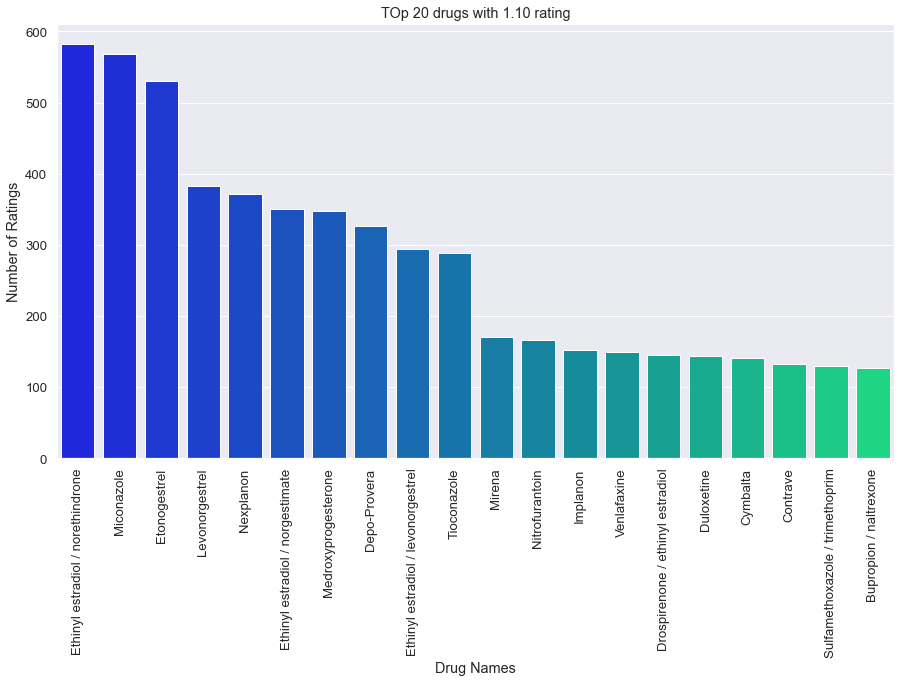

In [8]:
#Setting the parameter
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [15,8]

rating = dict(df.loc[df.rating == 1, "drugName"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y=drug_rating[0:20], palette = 'winter')

sns_rating.set_title('TOp 20 drugs with 1.10 rating')
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90);

From the graph above, "Miconazole" is the drug with the highest number of 1/10 ratings, about 767.

##### 3.3 What is the share of each ratings

In [9]:
#What are the sizes of each of the ratings in the train dataset
df['rating'].value_counts()

10    50989
9     27531
1     21619
8     18890
7      9456
5      8013
2      6931
3      6513
6      6343
4      5012
Name: rating, dtype: int64

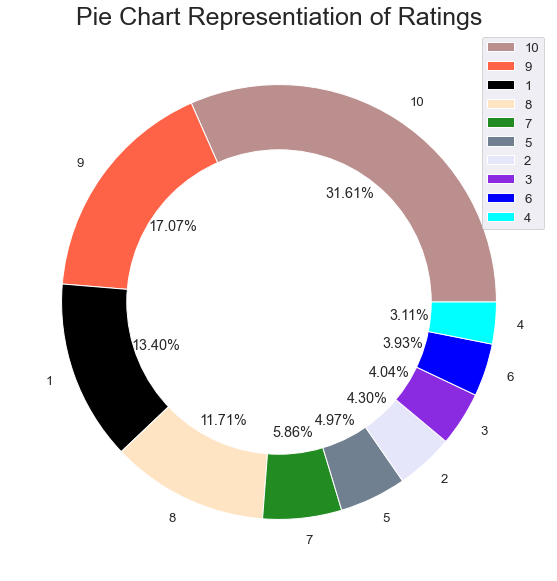

In [10]:
#Now lets make a donut chart to represent share of each of ratings

size = [50989,27531,21619,18890,9456,8013,6931,6513,6343,5012]
colors = ['rosybrown','tomato','black','bisque','forestgreen','slategrey','lavender','blueviolet',
         'blue','cyan']
labels = "10","9","1","8","7","5","2","3","6","4"

my_circle = plt.Circle((0,0),0.7, color = 'white')

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, autopct = '%.2f%%')
plt.axis('off')
plt.title('Pie Chart Representiation of Ratings', fontsize = 25)
p = plt.gcf()
plt.gca().add_artist(my_circle)
plt.legend()
plt.show()

##### 3.4 What is the distribution of each of the ratings??

C:\Users\Ochieng\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Ochieng\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Rating')

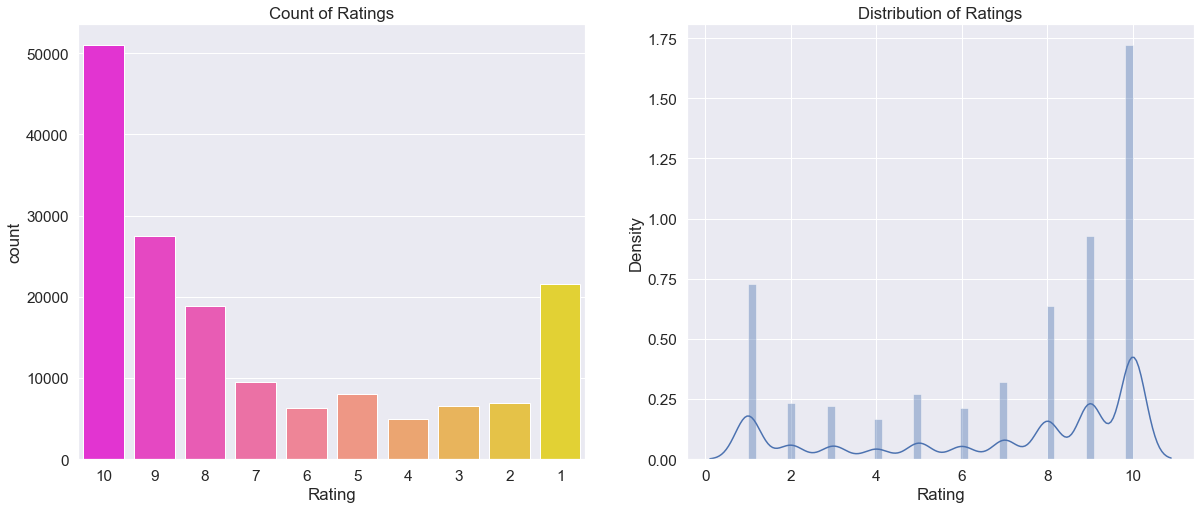

In [14]:
plt.rcParams['figure.figsize'] = [20,8]
sns.set(font_scale = 1.4, style = 'darkgrid')
fig, ax = plt.subplots(1, 2)

sns_1 = sns.countplot(df['rating'], palette = 'spring', order = list(range(10, 0, -1)), ax = ax[0])
sns_2 = sns.distplot(df['rating'], ax = ax[1])

sns_1.set_title('Count of Ratings')
sns_1.set_xlabel("Rating")

sns_2.set_title('Distribution of Ratings')
sns_2.set_xlabel("Rating")

The graphs above show the distribution of the rations from 1-10 in the dataset.

##### 3.5 What are the top 10 conditions that people are suffering from??

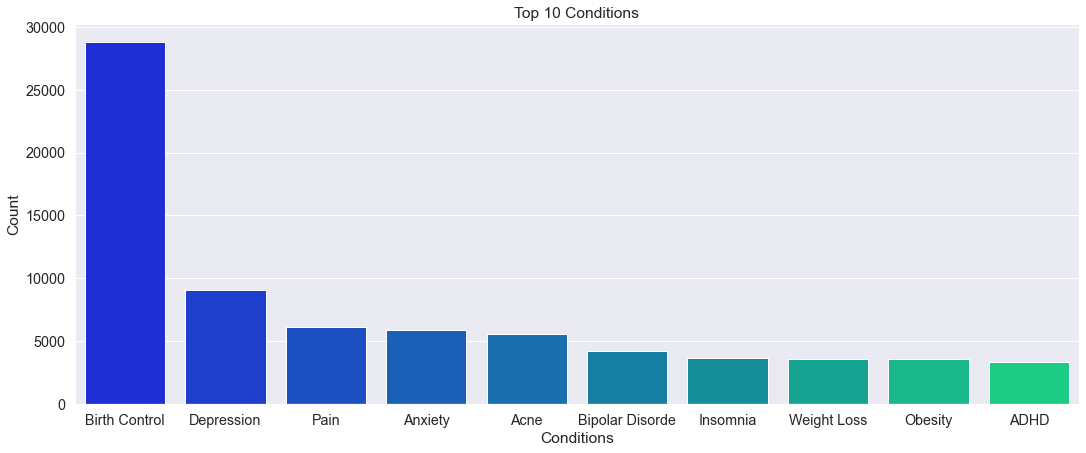

In [18]:
cond = dict(df['condition'].value_counts())
top_condition = list(cond.keys())[0:10]
values = list(cond.values())[0:10]
sns.set(style = 'darkgrid', font_scale = 1.3)
plt.rcParams['figure.figsize'] = [18, 7]

sns_ = sns.barplot(x = top_condition, y = values, palette = 'winter')
sns_.set_title ("Top 10 Conditions")
sns_.set_xlabel("Conditions")
sns_.set_ylabel("Count");

From the Graph, Birth control is the most prominent conditions by a very big margin followed by Depression and Pain.

##### 3.5 Which top 10 Drugs are used for Birth Control??

In [33]:
cond = dict(df['condition'].value_counts())
top_condition = list(cond.keys())[0:10]
print(top_condition)

['Birth Control', 'Depression', 'Pain', 'Anxiety', 'Acne', 'Bipolar Disorde', 'Insomnia', 'Weight Loss', 'Obesity', 'ADHD']


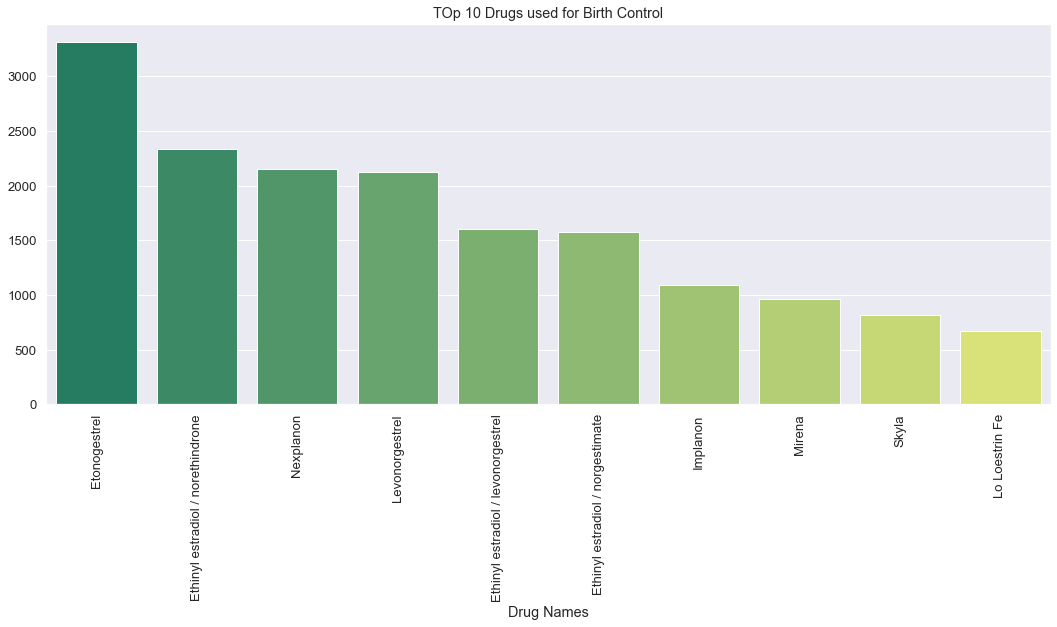

In [ ]:
df1 = df[df['condition'] == 'Birth Control'] ['drugName'].value_counts()[0:10]
sns.set(font_scale = 1.2, style = 'darkgrid')

sns_ = sns.barplot(x = df1.index, y = df1.values, palette = 'summer')
sns_.set_xlabel('Drug Names')
sns_.set_title("TOp 10 Drugs used for Birth Control")
plt.setp(sns_.get_xticklabels(), rotation = 90);

The Drug **Etonegestrel** is the most prominent Drug for Birth Control ,followed by **norethindrone** and Finally **Nexplanon**.

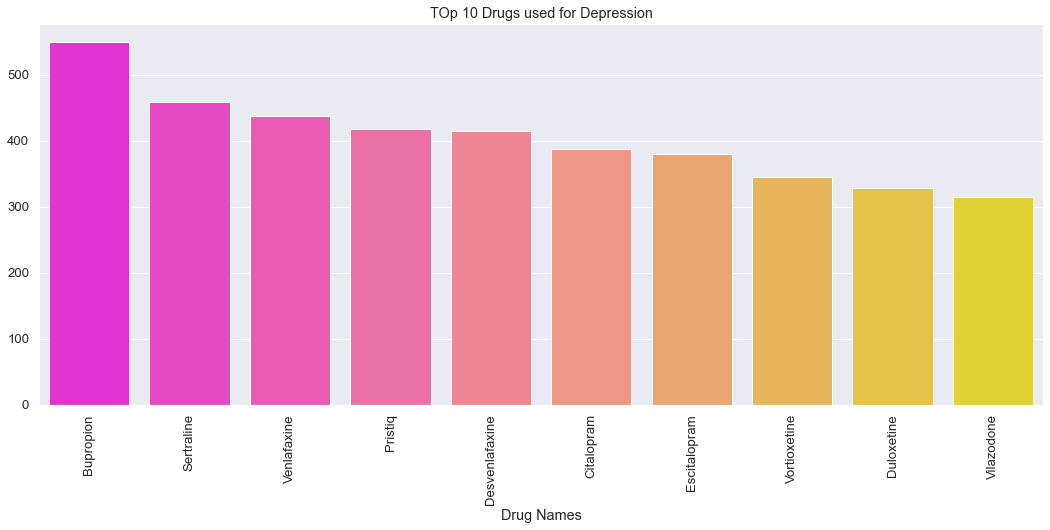

In [34]:
df2 = df[df['condition'] == 'Depression'] ['drugName'].value_counts()[0:10]
sns.set(font_scale = 1.2, style = 'darkgrid')

sns_ = sns.barplot(x = df2.index, y = df2.values, palette = 'spring')
sns_.set_xlabel('Drug Names')
sns_.set_title("TOp 10 Drugs used for Depression")
plt.setp(sns_.get_xticklabels(), rotation = 90);

The Drugs **Bupropion** is the most used drugs for depression followed by *Setraline** and finally **Venlafraxine**.

#### **3B Visualizing Reviews.**

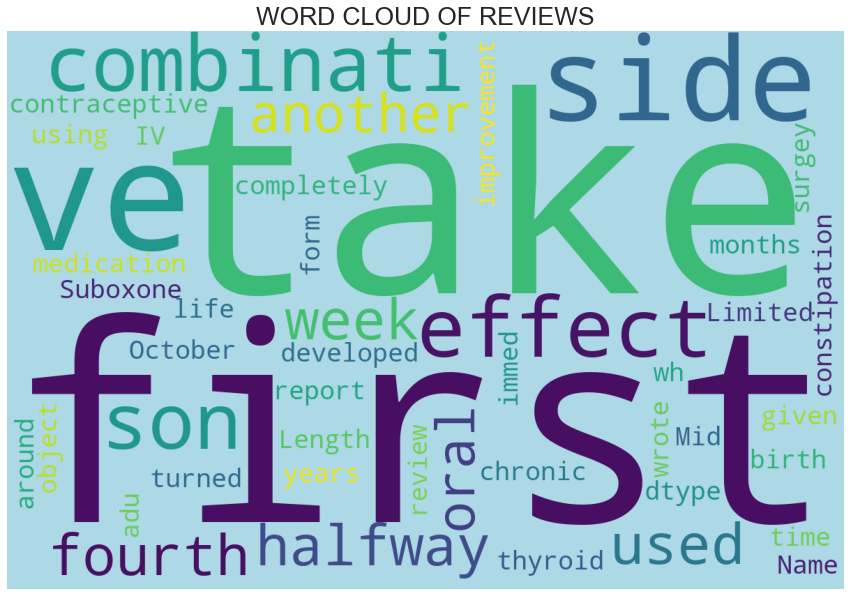

In [35]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'lightblue', stopwords = stopwords, width = 1200, height = 800).generate(str(df['review']))

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('WORD CLOUD OF REVIEWS', fontsize = 25)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

### 4. Feature Engineering

In [36]:
#Lets make a new column review sentimest
df.loc[(df['rating'] >= 5), 'Review_Sentiment'] = 1
df.loc[(df['rating']< 5), 'Review_Sentiment'] = 0

df['Review_Sentiment'].value_counts()

1.0    121222
0.0     40075
Name: Review_Sentiment, dtype: int64

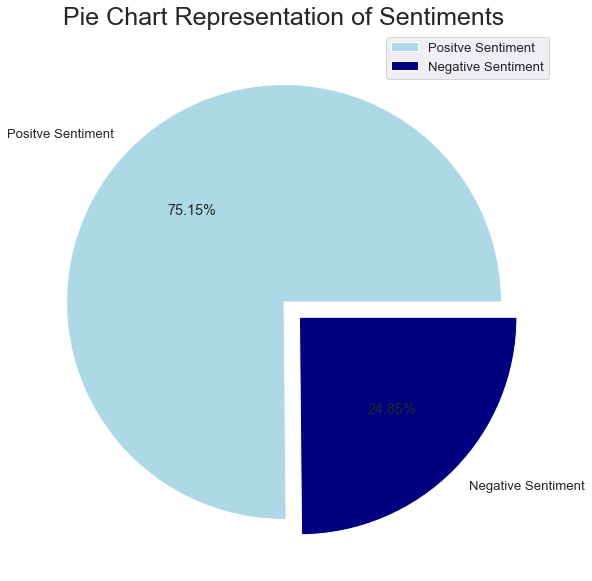

In [37]:
# A pie chart to represent the sentiments of the patients
size = [121222,40075]
colors = ['lightblue', 'navy']
labels = 'Positve Sentiment', "Negative Sentiment"
explode = [0,0.1]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, explode = explode, autopct = '%.2f%%')
plt.axis('off')
plt.title('Pie Chart Representation of Sentiments', fontsize = 25)
plt.legend()
plt.show()

#### 4.1 What are the positive sentments

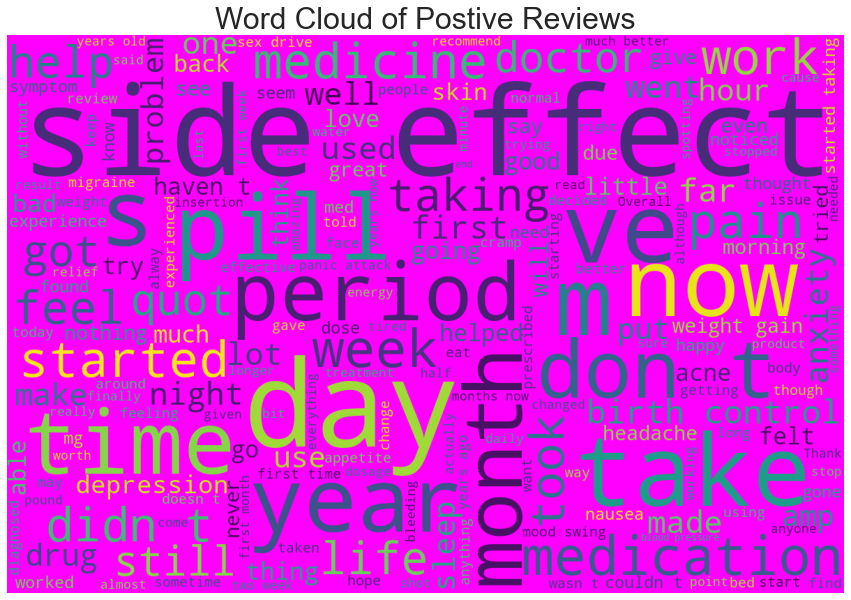

In [40]:
positive_sentiments = " ".join([text for text in df['review'][df['Review_Sentiment'] == 1]])

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color='magenta', stopwords=stopwords,width = 1200, height=800).generate(positive_sentiments)

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Word Cloud of Postive Reviews', fontsize = 30)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

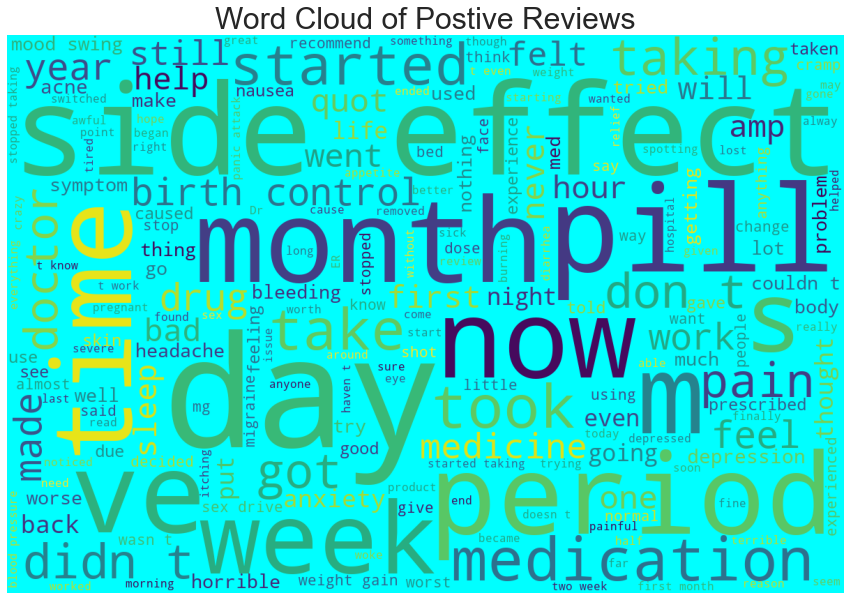

In [41]:
negative_sentiments = " ".join([text for text in df['review'][df['Review_Sentiment'] == 0]])

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color='cyan', stopwords=stopwords,width = 1200, height=800).generate(negative_sentiments)

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Word Cloud of Postive Reviews', fontsize = 30)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

#### 4.2 Visualizing Reviews Based on DateTime

In [44]:
#Converting the datetime into datetime format
df['date'] = pd.to_datetime(df['date'], errors = 'coerce')

#now extracting year from date
df['Year'] = df['date'].dt.year

#extracting the month fro the date
df['month'] = df['date'].dt.month

#extracting the days from the date
df['day'] = df['date'].dt.day

C:\Users\Ochieng\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


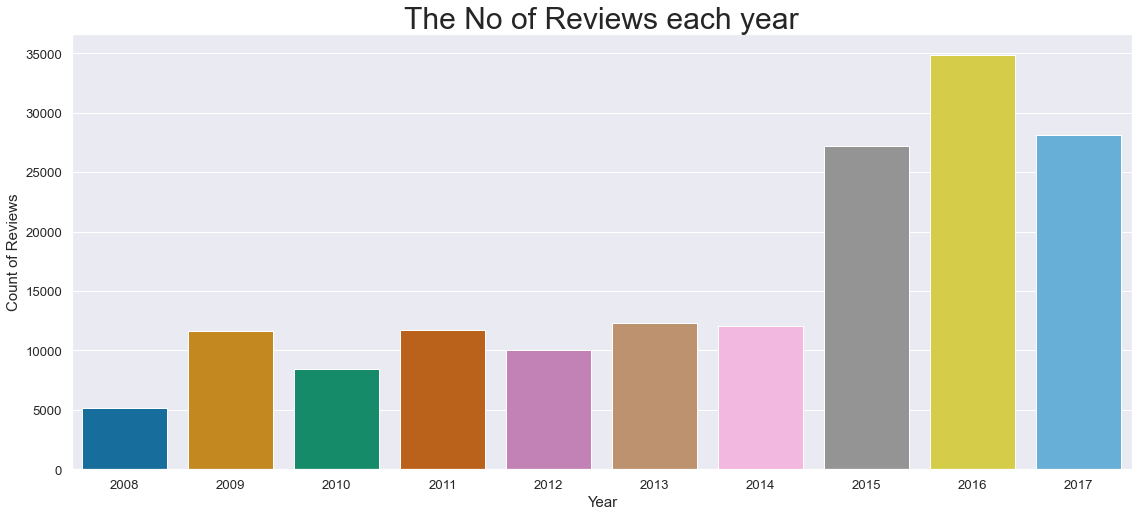

In [45]:
#looking at he no of reiews in each of the years
plt.rcParams['figure.figsize'] = (19,8)
sns.countplot(df['Year'], palette = 'colorblind')
plt.title('The No of Reviews each year', fontsize = 30)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Count of Reviews', fontsize = 15)
plt.show()

2016 had the highest Now of Reviews while 2008 had the lowest number of reviews across the board.
It would be interesting to know what happened in these two years, could be maybe the sales were high and low during these years consecutively.

**Ideas Worth investigating**
******************************
1. What drugs were mostly bought in 2016 and 2008?
2. What kind of reviews dominated these two years?

#### Visualization of Useful Count

C:\Users\Ochieng\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


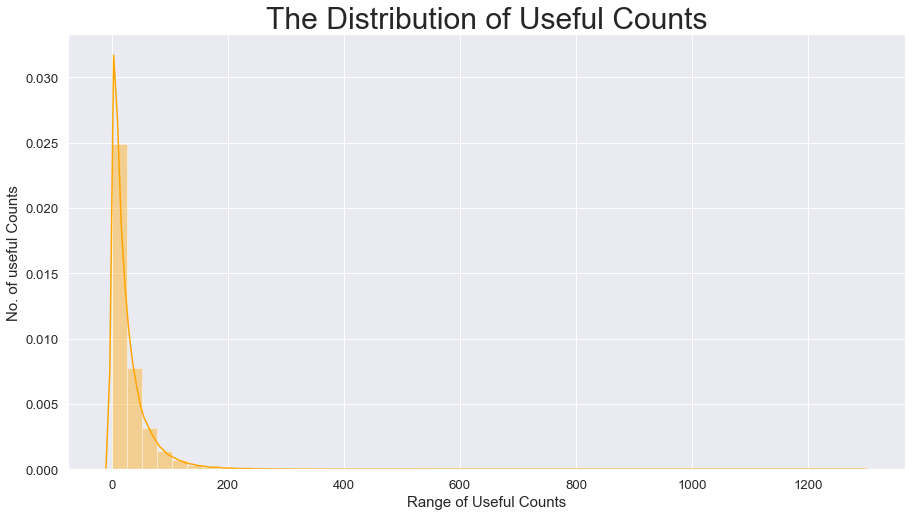

In [47]:
#Plotting a dist plt
plt.rcParams['figure.figsize'] = [15,8]
sns.distplot(df['usefulCount'], color = 'orange')
plt.title('The Distribution of Useful Counts', fontsize = 30)
plt.xlabel('Range of Useful Counts', fontsize = 15)
plt.ylabel('No. of useful Counts', fontsize = 15)
plt.show()